In [1]:
# Dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Save path to data set in a varible
city_file = os.path.join("raw_data", "city_data.csv")
ride_file = os.path.join("raw_data", "ride_data.csv")
city_file_pd = pd.read_csv('C:\\Users\\btm9355\\Desktop\\city_data.csv')
ride_file_pd = pd.read_csv('C:\\Users\\btm9355\\Desktop\\ride_data.csv')

In [13]:
#Create count column for ride file
ride_file_pd["Ride Count"] = 1

#Group ride file by city
ride_grouped = ride_file_pd.groupby(["city"], as_index='False')

#Sum fare and ride count columns for grouped ride file 
ride_grouped_summary = ride_grouped["fare", "Ride Count"].sum().reset_index('city')

#Add average ride fare column
ride_grouped_summary["Average Ride Fare"] = ride_grouped_summary["fare"]/ride_grouped_summary["Ride Count"]
ride_grouped_summary.head(10)

,city,fare,Ride Count,Average Ride Fare
0,Amandaburgh,443.55,18,24.641667
1,Barajasview,557.31,22,25.332273
2,Barronchester,582.76,16,36.422500
3,Bethanyland,593.21,18,32.956111
4,Bradshawfurt,400.64,10,40.064000
5,Brandonfort,673.31,19,35.437368
6,Carriemouth,764.49,27,28.314444
7,Christopherfurt,661.55,27,24.501852
8,Colemanland,679.68,22,30.894545
9,Davidfurt,543.93,17,31.995882


In [15]:
#Merge grouped ride file and city file
city_ride = pd.merge(city_file_pd, ride_grouped_summary, on="city", how="left")

In [16]:
#Create area column for scatter plot marker size scale
city_ride["area"] = city_ride["driver_count"]**1.75

In [17]:
#Add coloumn to hold color value for city type 
city_ride["color"] = city_ride["type"]
city_ride["color"] = city_ride["color"].replace({"Urban": "salmon", "Rural": "lemonchiffon", "Suburban": "lightblue"})

In [18]:

#Group city_ride file by type
type_grouped = city_ride.groupby(["type"], as_index='False')

#Sum fare and ride count columns for grouped type file 
type_grouped_summary = type_grouped["fare", "Ride Count"].sum().reset_index('type')
type_grouped_summary.head()

,type,fare,Ride Count
0,Rural,4327.93,125
1,Suburban,19356.33,625
2,Urban,39854.38,1625


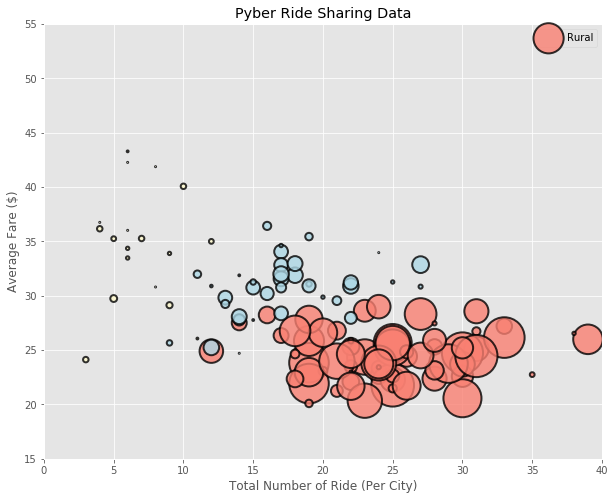

In [54]:
#Create scatter plot
plt.scatter(city_ride["Ride Count"], city_ride["Average Ride Fare"], marker ="o", c=city_ride["color"],
            edgecolors="black",s=city_ride["area"], alpha=0.8,linewidth=2) #ALPHA & EDGE COLOR & linewidth USEDDDD!!!!!!!#
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Ride (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(type_grouped_summary["type"], loc="best")
#Set x and y axis range
plt.ylim(15, 55)
plt.xlim(0, 40)
#Set gid style
plt.style.use('ggplot')


#Set size of grid
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()


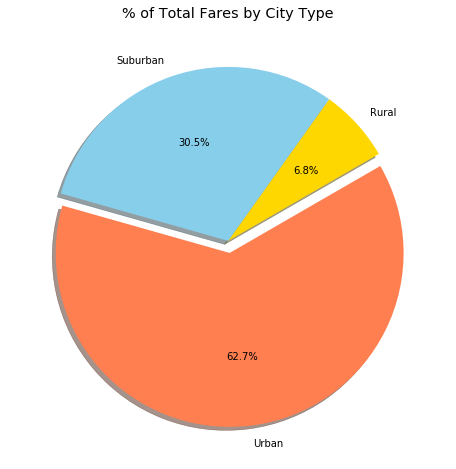

In [66]:
#Group city table by type
city_group_type = city_ride.groupby(["type"], as_index='False')

#Sum driver count, fare and ride count in city table grouped by type
city_group_type_summary = city_group_type["driver_count", "fare", "Ride Count"].sum().reset_index('type')

#Create color
colors = ["Gold", "skyblue", "coral"]
explode = [0, 0, 0.07]

#Plot pie chart for  the city table grouped by type for fare
plt.pie(city_group_type_summary["fare"], labels=city_group_type_summary["type"], colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=30) #SHADOW ,STARTANGLE, EXPLOSISON!!!! 
plt.title("% of Total Fares by City Type")
plt.show()

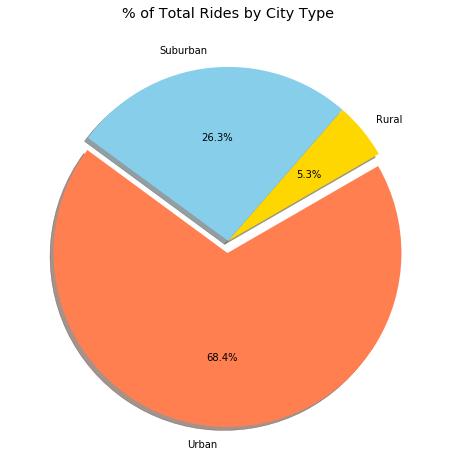

In [67]:
#Plot pie chart for the city table grouped by type for total rides
plt.pie(city_group_type_summary["Ride Count"], labels=city_group_type_summary["type"], colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=30) #SHADOW ,STARTANGLE, EXPLOSISON!!!! 
plt.title("% of Total Rides by City Type")
plt.show()

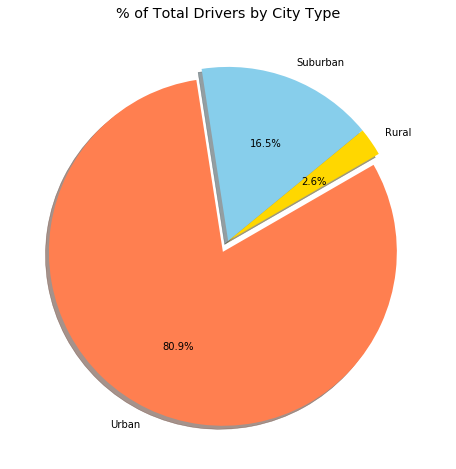

In [68]:
#Plot pie chart for the city table grouped by type for total rides
plt.pie(city_group_type_summary["driver_count"], labels=city_group_type_summary["type"], colors=colors,
        explode=explode, autopct="%1.1f%%", shadow=True, startangle=30)
plt.title("% of Total Drivers by City Type")
plt.show()